In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


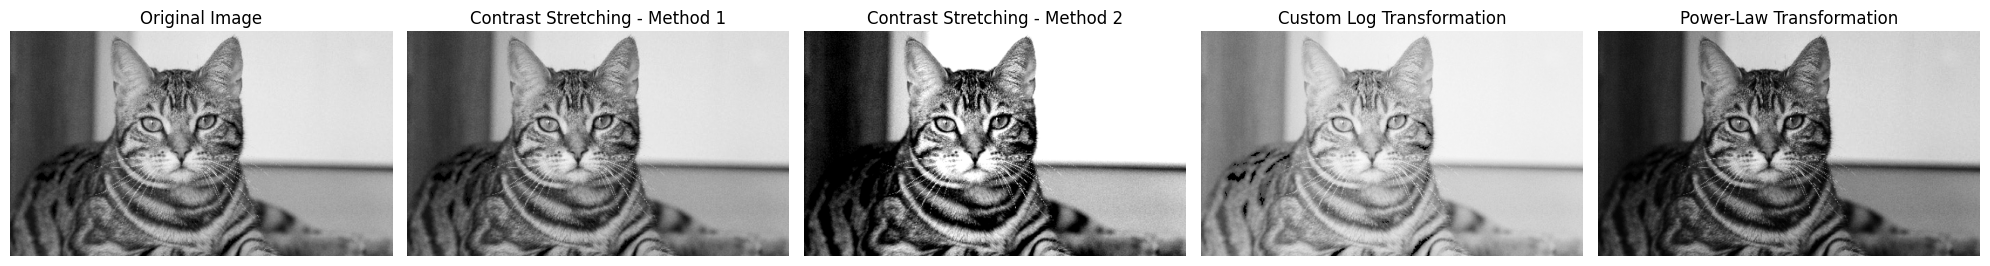

In [ ]:
import cv2
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
image = cv2.imread('/content/drive/MyDrive/CATTO.png', cv2.IMREAD_GRAYSCALE)

# Initialize variables to avoid functions
min_image = 255
max_image = 0

# Find minimum and maximum values manually
for row in image:
    for pixel in row:
        if pixel < min_image:
            min_image = pixel
        if pixel > max_image:
            max_image = pixel

# 1. Contrast Stretching - Method 1
result1 = np.zeros_like(image, dtype=np.uint8)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        result1[i, j] = int((image[i, j] - min_image) * (255 / (max_image - min_image)))

# 2. Contrast Stretching - Method 2
low, high = 50, 200
result2 = np.zeros_like(image, dtype=np.uint8)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if image[i, j] <= low:
            result2[i, j] = 0
        elif image[i, j] >= high:
            result2[i, j] = 255
        else:
            result2[i, j] = int((image[i, j] - low) * (255 / (high - low)))

# 3. Custom Log Transformation (simulated without np.log)
c = 1
result_log = np.zeros_like(image, dtype=np.uint8)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        transformed_value = int(c * ((image[i, j] / 255.0) ** 0.5) * 255)
        # Ensuring the value stays in 0-255 range
        if transformed_value > 255:
            transformed_value = 255
        elif transformed_value < 0:
            transformed_value = 0
        result_log[i, j] = transformed_value

# 4. Power-Law (Gamma) Transformation
gamma = 1.5
result_power = np.zeros_like(image, dtype=np.uint8)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        transformed_value = int((image[i, j] / 255.0) ** gamma * 255)
        # Ensuring the value stays in 0-255 range
        if transformed_value > 255:
            transformed_value = 255
        elif transformed_value < 0:
            transformed_value = 0
        result_power[i, j] = transformed_value

# Display the results side by side
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[1].imshow(result1, cmap='gray')
axes[1].set_title("Contrast Stretching - Method 1")
axes[2].imshow(result2, cmap='gray')
axes[2].set_title("Contrast Stretching - Method 2")
axes[3].imshow(result_log, cmap='gray')
axes[3].set_title("Custom Log Transformation")
axes[4].imshow(result_power, cmap='gray')
axes[4].set_title("Power-Law Transformation")

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()